# Implementation of Fischer’s Linear Discriminant Analysis in Python.


### Name: Tejas Yogesh Pawar
**======================================================================**

**Importing Libraries:**

In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

**Loading Train data:**

In [66]:
im_train = np.loadtxt('/content/train.csv', delimiter=',', dtype=int, skiprows=1)
train_labels = im_train[:, 0]
im_train = im_train[:, 1:]
nclasses = len(np.unique(train_labels))
nfeatures = np.size(im_train, axis=1)
class_indexes = []
for i in range(nclasses):
    class_indexes.append(np.argwhere(train_labels == i))

im_train.shape

(42000, 784)

In [67]:
class_means, other_class_means = np.empty((nclasses, nfeatures)), np.empty((nclasses, nfeatures))
other_class = []
SW_one, SW_two, SW = np.zeros((nclasses, nfeatures, nfeatures)), np.zeros((nclasses, nfeatures, nfeatures)), np.zeros((nclasses, nfeatures, nfeatures))
W = np.zeros((nclasses, nfeatures, 1))
W0 = np.zeros((nclasses))

**Calculating SW, W and W0:**

In [68]:
for i in range(nclasses):
    class_means[i] = np.mean(im_train[class_indexes[i]], axis=0)
    other_class.append(np.delete(im_train, class_indexes[i], axis=0)) # one-versus-the-rest approach
    other_class_means[i] = np.mean(other_class[i], axis=0)
    between_class1 = np.subtract(im_train[class_indexes[i]].reshape(-1, nfeatures), 
                                 class_means[i])
    SW_one[i] = between_class1.T.dot(between_class1)
    between_class2 = np.subtract(other_class[i], other_class_means[i])
    SW_two[i] = between_class2.T.dot(between_class2)
    SW[i] = SW_one[i] + SW_two[i]
    W[i] = np.dot(np.linalg.pinv(SW[i]), 
                  np.subtract(other_class_means[i], 
                              class_means[i]).reshape(-1, 1))
    W0[i] = -0.5 * np.dot(W[i].T, (class_means[i] + other_class_means[i]))

print("SW: ", SW.shape)
print("W: ", W.shape)
print("W0: ", W0.shape)

SW:  (10, 784, 784)
W:  (10, 784, 1)
W0:  (10,)


**Loading Test data:**

In [69]:
im_test = np.loadtxt('/content/test.csv', delimiter=',', dtype=int, skiprows=1)
im_test.shape

(28000, 784)

In [70]:
Y = np.zeros((len(im_test), nclasses))
predict = np.zeros((len(im_test)), dtype=int)
for j in range(len(im_test)):
    for i in range(nclasses):
        Y[j, i] = np.dot(W[i].T,  im_test[j]) + W0[i]
    predict[j] = np.argmin(Y[j])

predict[:12]

array([2, 0, 9, 4, 3, 7, 0, 3, 0, 3, 5, 7])

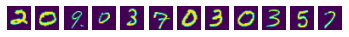

In [71]:
for i in range(12):
    plt.subplot(1, 12, i+1) # plot index can not be 0
    plt.imshow(im_test[i].reshape(28, 28))
    plt.axis('off')
plt.show()

In [72]:
output = pd.DataFrame({"ImageId": np.arange(1, len(im_test)+1), "Label": predict})
output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


**CONCLUSION:** Here, We successfully Implemented Fischer’s Linear Discriminant Analysis in Python.